# Building a simple neural-network with Keras

In [1]:
#let's import some prerequisites modules
import tensorflow as tf
import matplotlib.pyplot as plt 

#Gathering Data (load Data)
mnist = tf.keras.datasets.mnist # 28 * 28 of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load the data 

#change the pixels numbers of images to be from 0 to 1 (preparing That Data)
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#Build the Neural Network (model)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(), ) # flatten layer (convert matrix to single array)
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu)) #hidden layer (fully connceted layer)
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu)) #hidden layer (fully connceted layer)
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #output layer (fully connceted layer)

#parameters for a training this model (compiling the sequential model)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])




# Train our model..  (you feed the training data loaded in earlier into this model and it will learn to classify digits)

In [2]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1982 - accuracy: 0.9406
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0807 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0380 - accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0284 - accuracy: 0.9904


# Evaluation

In [3]:
#calculate a validation loss
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print('Test Score = ', val_loss)
print('Test Accuracy = ',  val_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9754
Test Score =  0.10226307809352875
Test Accuracy =  0.9753999710083008


In [4]:
print(x_train[0]) #the first element in the training dataset representation

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

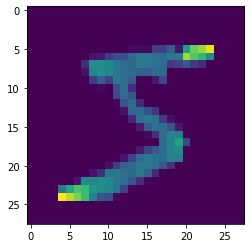

In [5]:
plt.imshow(x_train[0]) #first element in the training dataset showing

# Save and Load a model

In [12]:
#save a model 
model.save('epic_num__reader.model')

INFO:tensorflow:Assets written to: epic_num__reader.model\assets


In [7]:
#to load the pervious model that i saved
new_model = tf.keras.models.load_model('epic_num__reader.model')

# Inspecting the output

In [8]:
#make a prediction
prediction = new_model.predict([x_test])

In [9]:
#vector that represent the first element in the predection test
print(prediction[0]) 

[3.5467214e-14 4.3753882e-08 1.0061219e-07 3.7512280e-07 3.3531285e-11
 1.1394012e-10 2.7672543e-16 9.9999952e-01 1.5916474e-10 1.2269634e-10]


In [10]:
#get the first image in x_test class
import numpy as np
print(np.argmax(prediction[0])) #argmax return the position of max value along the vector

7


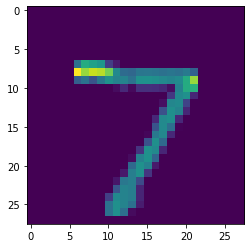

In [11]:
plt.imshow(x_test[0])
plt.show()

# Seven is the first element in the MNIST dataset